In [1]:
# THIS NOTEBOOK TRAINS THE CNN AUTOENCODER WITH THE 28by28 RESOLUTION DATASET

In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
import os
import numpy as np
from data_loader import DataLoader
from utils.visualize import show_images_in_grid, show_reconstruction
from cnn import Autoencoder
import random

In [4]:
root = os.getcwd()
cnn_train_dir = root+"/../datasets/training_set/data/cnn.npy"
cnn_test_dir = root+"/../datasets/test_set/data/cnn.npy"

In [5]:
# WE WON'T USE THE TEST DATA AT ALL AND INSTEAD SPLIT THE TRAIN DATA INTO TRAIN, TEST, AND VALIDATION DATASETS WITH THE DATA LOADER

In [6]:
cnn_data_loader = DataLoader(features_dir=cnn_train_dir, labels_dir=cnn_train_dir)
cnn_data_loader.split_train_val_test(train=0.7, val=0.2, test=0.1)
# NORMALIZE ALL PIXEL VALUES FROM 0-255 TO O-1
cnn_data_loader.preprocess(rescale=True)

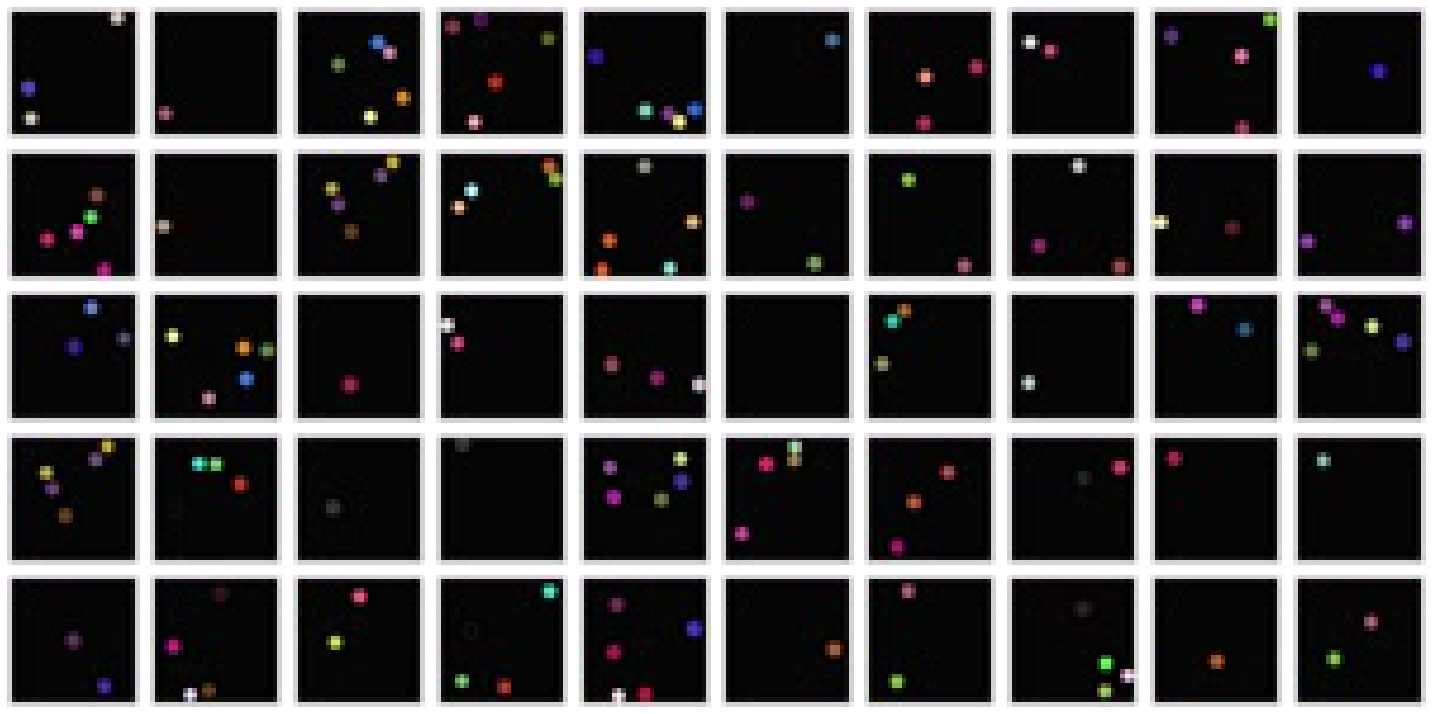

In [7]:
show_images_in_grid(images=cnn_data_loader.X_train, columns=10, rows=5, img_size=(50,50), plot_size=(20,10), rescale=True)

In [41]:
ae = Autoencoder()
ae.build_model(input_dim=(28, 28, 3), latent_dim=(64,))

In [42]:
ae.encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 64)        3136      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 64)          65600     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 64)          65600     
_________________________________________________________________
flatten_23 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                200768    
Total params: 335,104
Trainable params: 335,104
Non-trainable params: 0
_________________________________________________________________


In [43]:
ae.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 147)               9555      
_________________________________________________________________
reshape_23 (Reshape)         (None, 7, 7, 3)           0         
_________________________________________________________________
conv2d_transpose_34 (Conv2DT (None, 14, 14, 64)        3136      
_________________________________________________________________
conv2d_transpose_35 (Conv2DT (None, 14, 14, 64)        65600     
_________________________________________________________________
conv2d_transpose_36 (Conv2DT (None, 14, 14, 64)        65600     
_________________________________________________________________
flatten_24 (Flatten)         (None, 12544)             0         
__________

In [44]:
# TRAIN LOOP
for epoch in range(1000):
    print('EPOCH %d' % (epoch))
    ae.train(X_train=cnn_data_loader.X_train, 
             Y_train=cnn_data_loader.X_train, 
             X_val=cnn_data_loader.X_val, 
             Y_val=cnn_data_loader.X_val, 
             epochs=1, 
             batch_size=64, 
             shuffle=True)
    if epoch % 5 == 0:
        i = random.randint(0, cnn_data_loader.X_train.shape[0]-1)
        x = cnn_data_loader.X_train[i:i+1]
        y = ae.autoencoder.predict(x)
        show_reconstruction(x[0], y[0])
    ae.save_weights(root+"/../models/autoencoder.h5")

EPOCH 0
Train on 8893 samples, validate on 2541 samples
Epoch 1/1
3456/8893 [==========>...................] - ETA: 52s - loss: 0.1157

KeyboardInterrupt: 